In [1]:
import pandas as pd
from scipy.optimize import fsolve

# Using rating curve as the outfall boundary 

In InfoWorks ICM, you can set the oufall as a free outfall, or using a level object to define the outfall boundary.

If you would like to use a rating curve as the boundary, the easiest way is to convert your outfall to a screw pump with the rating curve.

In this example, we'll use a rating curve which will overwrite the free outfall with a normal depth.

The results are compared to a SWMM5 model results.

Normal depth, and critical depth were hand calculated shown as Yn and Yc in the graphs.

Speical note for using fsolve to calculate Yn.

In [24]:
def read_excel(excel_path, tab):
    df = pd.read_excel(excel_path, tab)
    df.index = pd.to_datetime(df['DATETIME'])
    del df['DATETIME']
    return df


def normal_depth(q, n, w, s):
    y0 = (q/w*n/(s**0.5))**(3/5)
    def get_yn(y):
        a = y*w
        r = a/(w + 2*y)
        return q - 1/n*r**(2/3)*s**0.5*a
    yn= fsolve(get_yn, y0)
    return yn[0]

def critical_depth(q, w):
    yc = ((q/w)**2/9.81)**(1/3)
    return yc


In [30]:
def plot_rating_curve(df, flow_fld, depth_fld, n, w, slope):
    ax = df.plot(x=flow_fld, y=depth_fld, style='x')
    df['yn'] = df.apply(lambda x: normal_depth(x[flow_fld], n, w, slope), axis =1)
    df['yc'] = df.apply(lambda x: critical_depth(x[flow_fld], w), axis =1)
    df.plot(x=flow_fld, y='yn', ax=ax)
    df.plot(x=flow_fld, y='yc', ax=ax)
    ax.set_ylabel(depth_fld)
    return ax, df

Text(0.5, 1.0, 'ICM free outfall')

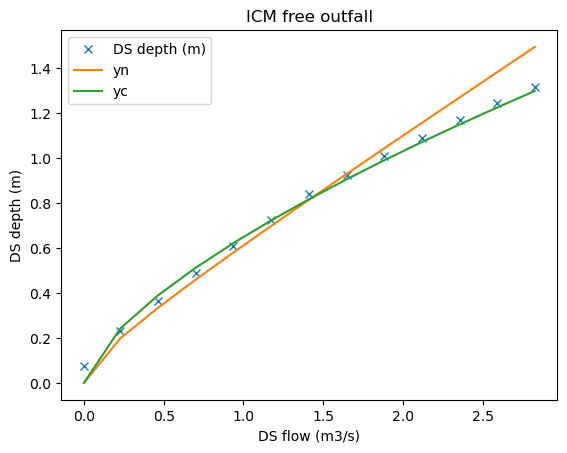

In [40]:
w = 610 #mm
w = w/1000 #m
h = 1524 #mm
n = 0.01
slope = 0.006 #m/m
f = './data/data.xlsx'

icm = read_excel(f,'ICM')
flow_fld = 'DS flow (m3/s)'
depth_fld ='DS depth (m)'
ax, icm = plot_rating_curve(icm, flow_fld, depth_fld, n, w, slope)
ax.set_title('ICM free outfall')


Text(0.5, 1.0, 'ICM Screw Pump rating curve outfall')

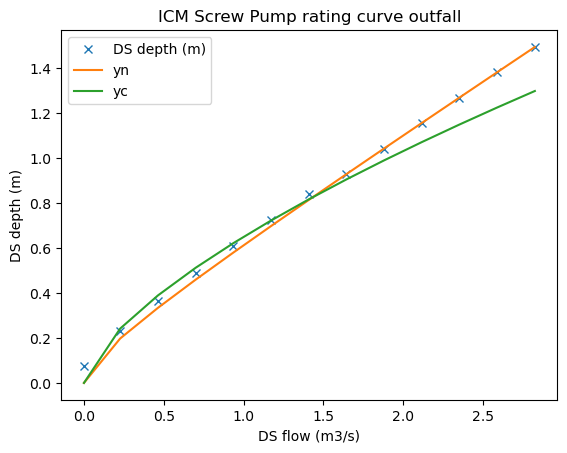

In [45]:
icm = read_excel(f,'ICM_RC')
flow_fld = 'DS flow (m3/s)'
depth_fld ='DS depth (m)'
ax, icm = plot_rating_curve(icm, flow_fld, depth_fld, n, w, slope)
ax.set_title('ICM Screw Pump rating curve outfall')

Text(0.5, 1.0, 'SWMM5 FREE outfall')

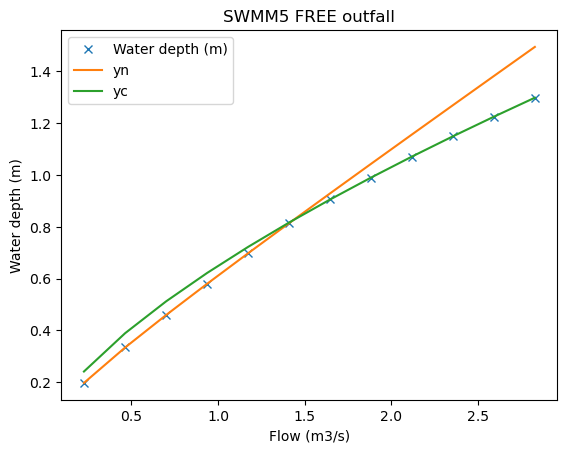

In [33]:
flow_fld = 'Flow (m3/s)'
depth_fld ='Water depth (m)'
swmm5_normal = read_excel(f, 'SWMM5_FREE')
ax, swmm5_normal = plot_rating_curve(swmm5_normal, flow_fld, depth_fld, n, w, slope)
ax.set_title('SWMM5 FREE outfall')

Text(0.5, 1.0, 'SWMM5 Normal outfall')

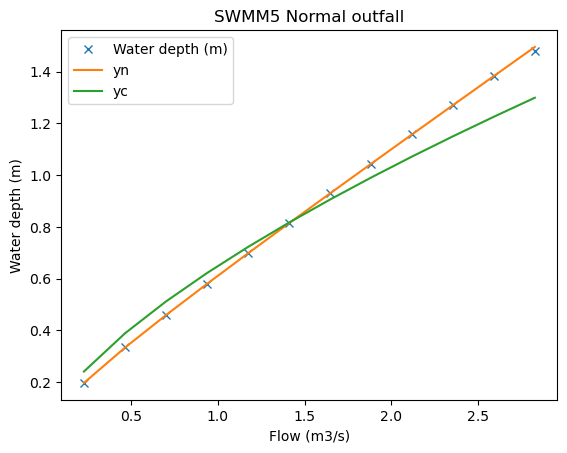

In [34]:
flow_fld = 'Flow (m3/s)'
depth_fld ='Water depth (m)'
swmm5_normal = read_excel(f, 'SWMM5_NORMAL')
ax, swmm5_normal = plot_rating_curve(swmm5_normal, flow_fld, depth_fld, n, w, slope)
ax.set_title('SWMM5 Normal outfall')

Text(0.5, 1.0, 'Normal depth')

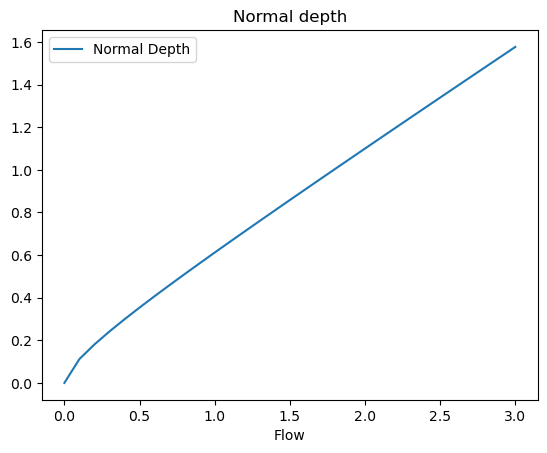

In [46]:
#getting the rating curve for normal flow
import numpy as np
qs = np.linspace(0,3, 31)
ys = [normal_depth(q, n, w, slope) for q in qs]

df = pd.DataFrame({'Flow':qs,'Normal Depth':ys})
ax = df.plot(x='Flow', y=['Normal Depth'])
ax.set_title('Normal depth')


In [35]:
df

,Flow,Normal Depth
0,0.0,0.000000
1,0.1,0.112137
2,0.2,0.180624
3,0.3,0.241519
4,0.4,0.298671
5,0.5,0.353554
6,0.6,0.406909
7,0.7,0.459167
8,0.8,0.510601
9,0.9,0.561395
